In [44]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [45]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
import matplotlib.pyplot as plt

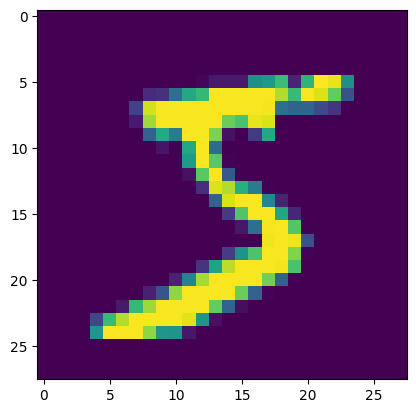

In [49]:
plt.imshow(X_train[0])

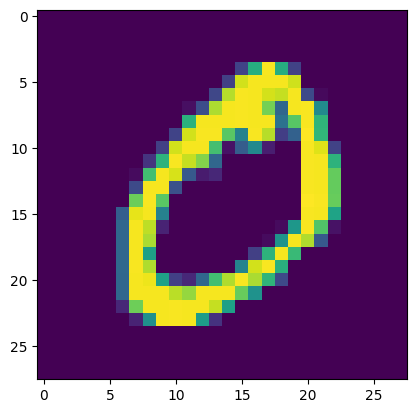

In [50]:
plt.imshow(X_train[1])

In [51]:
X_train = X_train/255
X_test = X_test/255

In [52]:
model = Sequential()
# flatten -> convert higher dimension data into one dimension

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8467 - loss: 0.5127 - val_accuracy: 0.9567 - val_loss: 0.1467
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9631 - loss: 0.1313 - val_accuracy: 0.9617 - val_loss: 0.1264
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9748 - loss: 0.0828 - val_accuracy: 0.9690 - val_loss: 0.1033
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0623 - val_accuracy: 0.9709 - val_loss: 0.1035
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9852 - loss: 0.0491 - val_accuracy: 0.9728 - val_loss: 0.0924
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.9743 - val_loss: 0.0921
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0272 - val_accuracy: 0.9716 - val_loss: 0.1053
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.0204 - 

In [56]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [57]:
y_pred = y_prob.argmax(axis=1)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pred)

0.9763

In [60]:
import matplotlib.pyplot as plt

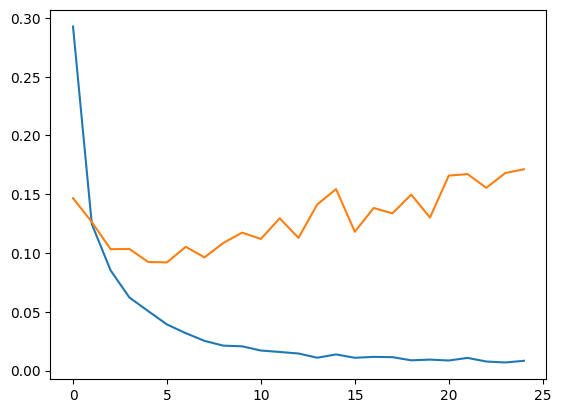

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

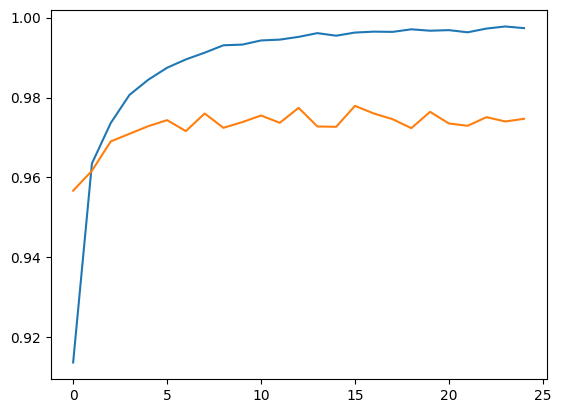

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

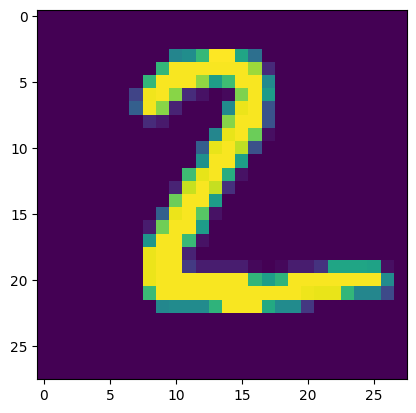

In [63]:
plt.imshow(X_test[1])

In [64]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


array([2])